In [0]:
import pandas as pd
import numpy as np


In [221]:
##READING INPUT FILE, INITIAL SPACES IN COLUMNS HAVE TO SKIPPED AS THERE WAS A PROBLEM IN DROPPING COLUMNS WITHOUT THIS STATEMENT. 
df0 = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv",skipinitialspace=True)
df0.head

<bound method NDFrame.head of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [222]:

##CHECKING FOR NULL VALUES

df0.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [0]:
###WE HAVE TO USE PERFORMANCE METRICS:
##ACCURACY: MIGHT BE A BAD ONE. HERE AFTER CALCULATING CONFUSION MATRICES OF ALGOS WHEREEVER TRUE NEGATIVES MIGHT BE MORE, USING ACCURACY WOULD BE A BAD METRIC. IT MIGHT GIVE A FALSE IMPRESSION OF CORRECTNESS BUT WILL MISS ON PREDICTING MANY TRUE POSITIVE CASES AS TRUE NEGATIVE ARE MORE. THIS WOULD BE A PROBLEM. WHENEVER IT HAS TO RIGHTLY PREDICT A PERSON WILL LEAVE THE COMPANY, IT MIGHT MISS IT. BUT WILL PREDICT BETTER IN CASES WHERE THE PERSON WILL NOT LEAVE THE COMPANY. 
##RECALL: IF IT IS MORE, WHEREVER ATTRITION SHOULD HAVE SHOWN YES, IN MANY CASES IT WILL SHOW YES.SO, IT IS AN IMPORTANT MEASURE TO PROTECT EMPLOYEES FROM CHANGING COMPANIES BEFOREHAND.
##PRECISION: IT IS ALSO IMPORTANT. IF IT IS MORE, IT WILL INDICATE THAT HIGH NUMBER OF CHOICES WHICH HAVE BEEN CORRECTLY PREDICTED.

In [223]:
##MAPPING TARGET YES VALUE TO 1 AND NO VALUE TO ZERO
level = {'No': 0, 'Yes': 1}
df0['Attrition']=df0['Attrition'].map(level)
df0.dtypes
df0['Attrition']


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [87]:
##WE CAN SEE THAT THERE ARE MORE SAMPLES IN THE DATASET WHERE THE TARGET VALUE ATTRITION IS NO AND SO THE DATASET SEEMS UNBALANCED
df0.Attrition.value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

In [228]:
df0.OverTime.value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object>

In [229]:
df0['OverTime']=df0['OverTime'].map(level)
df0['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [0]:
##WE WILL NOW REMOVE UNNECESSARY COLUMNS WHICH WILL NOT HELP US IN PREDICTING THE RESULT
##THE FOLLOWING COLUMNS HAVE THE SAME VALUE IN THE WHOLE DATASET AND WILL NOT PLAY A MAJOR ROLE IN ATTRITION PREDICTION
##Employee number has a unique number all over.
df0.drop(columns=['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis=1, inplace=True)

In [230]:
df0.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


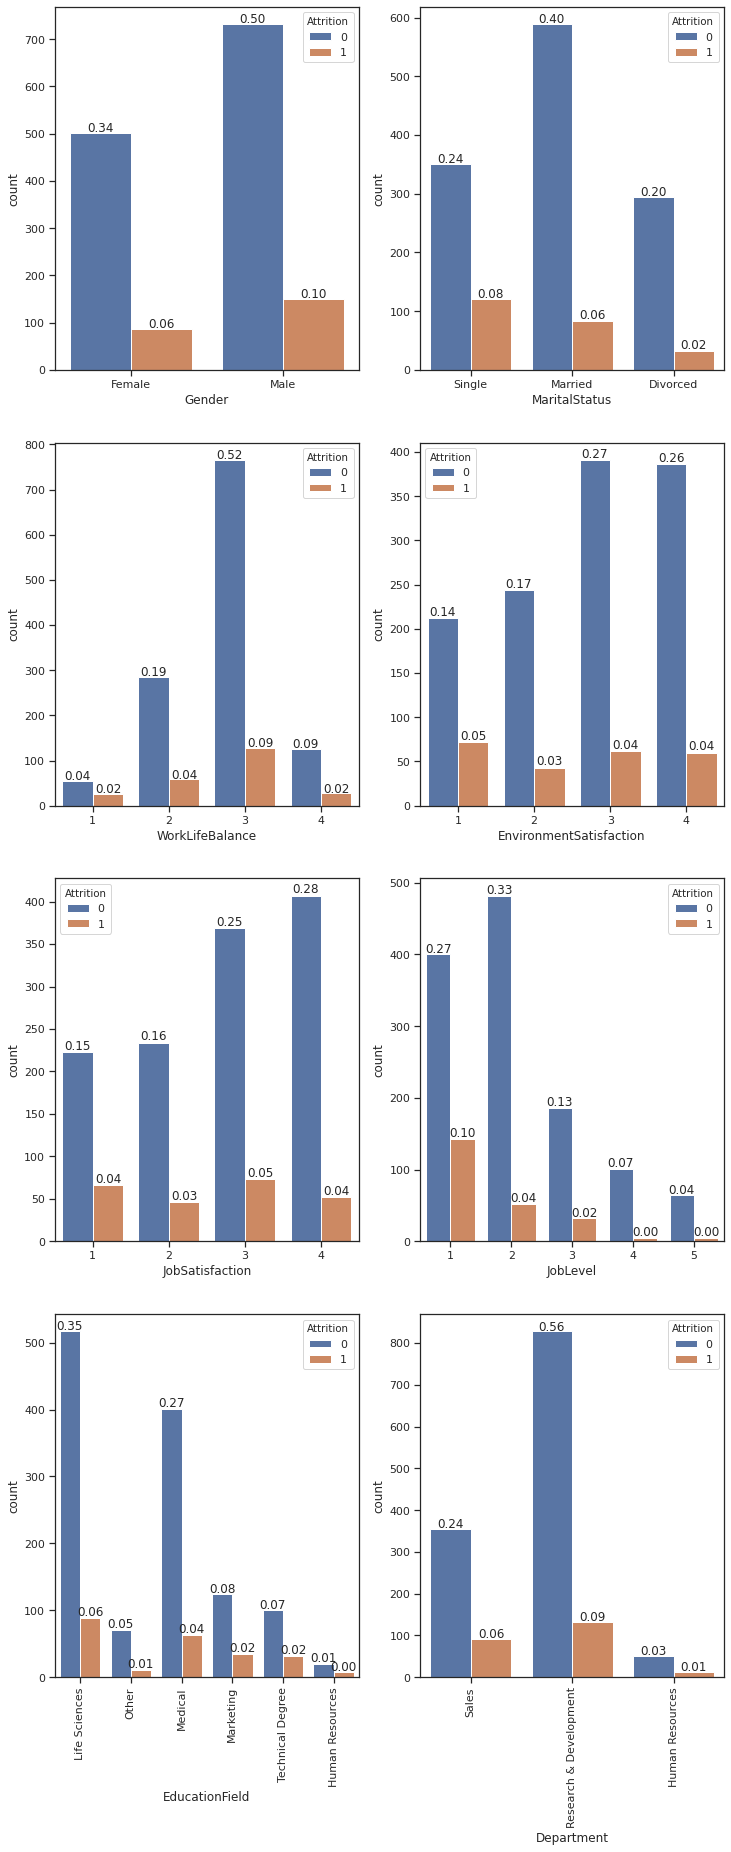

In [89]:
##DATA VISUALIZATION COMPARING EATURES WITH TARGET VALUE##
import matplotlib.pyplot as plt
import seaborn as sns
total_records= len(df0)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","EducationField","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=df0,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.010661,0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.056652,0.077924,0.031373,0.103369,0.006846,0.130016,0.169105,0.103481,0.159840,0.015170,0.043494,0.246118,0.013478,0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
DailyRate,0.010661,0.056652,1.000000,0.004985,0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.077924,0.004985,1.000000,0.021042,0.016075,0.031131,0.008783,0.005303,0.003669,0.017014,0.027473,0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.016806,0.021042,1.000000,0.027128,0.016775,0.042438,0.101589,0.011296,0.094961,0.026084,0.126317,0.020322,0.011111,0.024539,0.009118,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.103369,0.018355,0.016075,0.027128,1.000000,0.049857,0.008278,0.001212,0.006784,0.006259,0.037600,0.012594,0.070132,0.031701,0.029548,0.007665,0.003432,0.002693,0.019359,0.027627,0.001458,0.018007,0.016194,0.004999
HourlyRate,0.024287,0.006846,0.023381,0.031131,0.016775,0.049857,1.000000,0.042861,0.027853,0.071335,0.015794,0.015297,0.022157,0.007782,0.009062,0.002172,0.001330,0.050263,0.002334,0.008548,0.004607,0.019582,0.024106,0.026716,0.020123
JobInvolvement,0.029820,0.130016,0.046135,0.008783,0.042438,0.008278,0.042861,1.000000,0.012630,0.021476,0.015271,0.016322,0.015012,0.003507,0.017205,0.029071,0.034297,0.021523,0.005533,0.015338,0.014617,0.021355,0.008717,0.024184,0.025976
JobLevel,0.509604,0.169105,0.002966,0.005303,0.101589,0.001212,0.027853,0.012630,1.000000,0.001944,0.950300,0.039563,0.142501,0.000544,0.034730,0.021222,0.021642,0.013984,0.782208,0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,0.004892,0.103481,0.030571,0.003669,0.011296,0.006784,0.071335,0.021476,0.001944,1.000000,0.007157,0.000644,0.055699,0.024539,0.020002,0.002297,0.012454,0.010690,0.020185,0.005779,0.019459,0.003803,0.002305,0.018214,0.027656


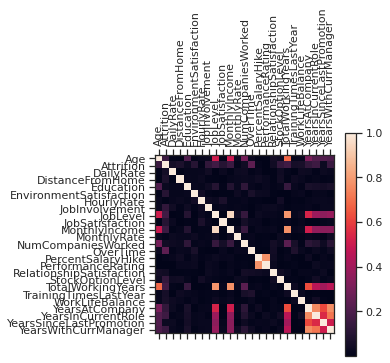

In [231]:
###CALCULATING CORRELATION COEFFICIENTS###
import matplotlib.pyplot as plt
wcorr = df0.corr() 
plt.matshow(wcorr.abs()) 
plt.colorbar() 
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical')
plt.yticks(range(len(wcorr.columns)), wcorr.columns)
#Another way of displaying the correlations 
wcorr.abs().style.background_gradient() 

In [0]:
##Monthly income is highly correlated with Job level. 
##Job level is highly correlated with total working hours.
## Monthly income is highly correlated with total working hours.
## Age is also positively correlated with the Total working hours.


In [0]:
###REMOVING HIGHLY CORRELATED FEATURES###
df1 = df1.drop(columns={'MonthlyIncome', 'JobLevel', 'TotalWorkingYears','Age'})


In [0]:
df1 = df1.drop(columns={'PercentSalaryHike','PerformanceRating'})


In [0]:

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [233]:
df0['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [235]:
##CREATING DUMMIES FOR CATEGORICAL VALUES
df1 = df0.copy()
df1 = pd.get_dummies(df1, columns=['BusinessTravel','Department','Gender','JobRole','EducationField','MaritalStatus'], prefix = ['BT','DPT','GDR','JRL','EF','MS'])

print(df1.head())

   Age  Attrition  DailyRate  ...  MS_Divorced  MS_Married  MS_Single
0   41          1       1102  ...            0           0          1
1   49          0        279  ...            0           1          0
2   37          1       1373  ...            0           0          1
3   33          0       1392  ...            0           1          0
4   27          0        591  ...            0           1          0

[5 rows x 51 columns]


In [236]:
df1.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BT_Non-Travel,BT_Travel_Frequently,BT_Travel_Rarely,DPT_Human Resources,DPT_Research & Development,DPT_Sales,GDR_Female,GDR_Male,JRL_Healthcare Representative,JRL_Human Resources,JRL_Laboratory Technician,JRL_Manager,JRL_Manufacturing Director,JRL_Research Director,JRL_Research Scientist,JRL_Sales Executive,JRL_Sales Representative,EF_Human Resources,EF_Life Sciences,EF_Marketing,EF_Medical,EF_Other,EF_Technical Degree,MS_Divorced,MS_Married,MS_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.400000,0.600000,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.222449,0.457823,0.319728
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.302805,0.391193,0.454137,0.202604,0.475939,0.459884,0.490065,0.490065,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.416033,0.498387,0.466530
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.0000

In [242]:
# create training and testing variables
X = df1.drop(["Attrition"],axis=1)
y = df1['Attrition']
train_X, X_test, train_y, y_test = train_test_split(X, y, test_size=0.3)
print (train_X.shape, train_y.shape)
print (X_test.shape, y_test.shape)


(1029, 44) (1029,)
(441, 44) (441,)


In [239]:
df1.head()

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BT_Non-Travel,BT_Travel_Frequently,BT_Travel_Rarely,DPT_Human Resources,DPT_Research & Development,DPT_Sales,GDR_Female,GDR_Male,JRL_Healthcare Representative,JRL_Human Resources,JRL_Laboratory Technician,JRL_Manager,JRL_Manufacturing Director,JRL_Research Director,JRL_Research Scientist,JRL_Sales Executive,JRL_Sales Representative,EF_Human Resources,EF_Life Sciences,EF_Marketing,EF_Medical,EF_Other,EF_Technical Degree,MS_Divorced,MS_Married,MS_Single
0,1,1102,1,2,2,94,3,4,19479,8,1,1,0,0,1,6,4,0,5,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0,279,8,1,3,61,2,2,24907,1,0,4,1,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,1373,2,2,4,92,2,3,2396,6,1,2,0,3,3,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1392,3,4,4,56,3,3,23159,1,1,3,0,3,3,8,7,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,591,2,1,1,40,3,2,16632,9,0,4,1,3,3,2,2,2,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
##USING LOGISTIC REGRESSION
logreg_mod = LogisticRegression(random_state=42, class_weight='balanced').fit(train_X,train_y)


In [244]:
y_pred_logreg = logreg_mod.predict(train_X)
y_pred_logreg

array([1, 0, 1, ..., 0, 1, 0])

In [245]:
y_pred_logreg1 = logreg_mod.predict(X_test)
y_pred_logreg1

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [246]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
print("Accuracy Score:", accuracy_score(y_pred_logreg, train_y))
print("F1 Score :",f1_score(y_pred_logreg,train_y,average = "weighted"))
print('Report:\n',classification_report(train_y, y_pred_logreg))
print('Confusion Matrix: \n',confusion_matrix(train_y, y_pred_logreg)) 

Accuracy Score: 0.652089407191448
F1 Score : 0.6064480195279217
Report:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76       865
           1       0.26      0.65      0.37       164

    accuracy                           0.65      1029
   macro avg       0.59      0.65      0.57      1029
weighted avg       0.81      0.65      0.70      1029

Confusion Matrix: 
 [[564 301]
 [ 57 107]]


In [247]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
print("Accuracy Score:", accuracy_score(y_pred_logreg1, y_test))
print("F1 Score :",f1_score(y_pred_logreg1,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_logreg1))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_logreg1)) 

Accuracy Score: 0.6303854875283447
F1 Score : 0.5831805689495893
Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74       368
           1       0.26      0.67      0.38        73

    accuracy                           0.63       441
   macro avg       0.58      0.65      0.56       441
weighted avg       0.80      0.63      0.68       441

Confusion Matrix: 
 [[229 139]
 [ 24  49]]


In [0]:
###USING DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dectre_mod = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(train_X,train_y)

In [249]:
y_pred_dectre = dectre_mod.predict(train_X)
y_pred_dectre

array([0, 0, 0, ..., 0, 0, 0])

In [250]:
y_pred_dectre1 = dectre_mod.predict(X_test)
y_pred_dectre1 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [251]:
print("Accuracy Score:", accuracy_score(y_pred_dectre, train_y))
print("F1 Score :",f1_score(y_pred_dectre,train_y,average = "weighted"))
print('Report:\n',classification_report(train_y, y_pred_dectre))
print('Confusion Matrix: \n',confusion_matrix(train_y, y_pred_dectre))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       164

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

Confusion Matrix: 
 [[865   0]
 [  0 164]]


In [252]:
print("Accuracy Score:", accuracy_score(y_pred_dectre1, y_test))
print("F1 Score :",f1_score(y_pred_dectre1,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_dectre1))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_dectre1))

Accuracy Score: 0.7755102040816326
F1 Score : 0.7748993474940996
Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       368
           1       0.32      0.33      0.33        73

    accuracy                           0.78       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.78      0.78      0.78       441

Confusion Matrix: 
 [[318  50]
 [ 49  24]]


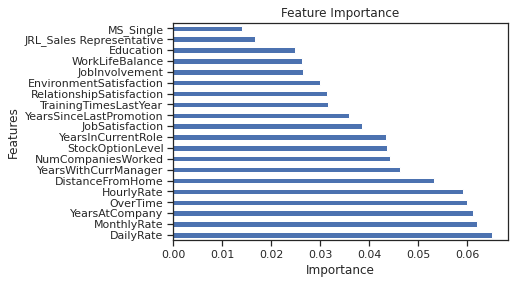

In [256]:
###FINDING FEATURE IMPORTANCE USING RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNING###
rfc_mod = RandomForestClassifier(n_estimators=100,random_state=42, class_weight='balanced').fit(train_X, train_y)
feat_importances = pd.Series(rfc_mod.feature_importances_, index=train_X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show() 


In [258]:
###CONSIDERING RECURSIVE FEATURE ELIMINATION TO BUILD MY NEXT RANDOM FOREST CLASSIFIER MODEL###
from sklearn.feature_selection import RFE
rfe = RFE(rfc_mod, 20)
rfe.fit(train_X,train_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight='balanced', criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [0]:
colm = train_X.columns[rfe.support_]

In [262]:
rfc_mod.fit(train_X[colm],train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [269]:
y_pred_rfc1= rfc_mod.predict(train_X[colm])
y_pred_rfc1

array([0, 0, 0, ..., 0, 0, 0])

In [264]:
_y_pred_rfc2 = rfc_mod.predict(X_test[colm])
y_pred_rfc2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [270]:
print("Accuracy Score:", accuracy_score(y_pred_rfc1, train_y))
print("F1 Score :",f1_score(y_pred_rfc1,train_y,average = "weighted"))
print('Report:\n',classification_report(train_y, y_pred_rfc1))
print('Confusion Matrix: \n',confusion_matrix(train_y, y_pred_rfc1))

Accuracy Score: 1.0
F1 Score : 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       164

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

Confusion Matrix: 
 [[865   0]
 [  0 164]]


In [265]:
print("Accuracy Score:", accuracy_score(y_pred_rfc2, y_test))
print("F1 Score :",f1_score(y_pred_rfc2,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_rfc2))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_rfc2))

Accuracy Score: 0.8412698412698413
F1 Score : 0.907476507646287
Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       368
           1       1.00      0.04      0.08        73

    accuracy                           0.84       441
   macro avg       0.92      0.52      0.50       441
weighted avg       0.87      0.84      0.78       441

Confusion Matrix: 
 [[368   0]
 [ 70   3]]


In [295]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


data = {'Metric':[' Accuracy','F1 Score','Recall','Precision'],
        'RFC using RFE':[accuracy_score(y_pred_rfc2, y_test),f1_score(y_pred_rfc2,y_test,average = "weighted"),recall_score(y_pred_rfc2, y_test,average="weighted"),precision_score(y_pred_rfc2, y_test,average="weighted")],
        'Decision Trees':[accuracy_score(y_pred_dectre1, y_test),f1_score(y_pred_dectre1, y_test,average="weighted"),recall_score(y_pred_dectre1, y_test,average="weighted"),precision_score(y_pred_dectre1, y_test,average="weighted")],
       'Logistic Regression': [accuracy_score(y_pred_logreg1, y_test),f1_score(y_pred_logreg1, y_test,average="weighted"),recall_score(y_pred_logreg1, y_test,average="weighted"),precision_score(y_pred_logreg1, y_test,average="weighted")]}
                          
df = pd.DataFrame(data,columns=['Metric','RFC using RFE','Decision Trees','Logistic Regression'])
df

,Metric,RFC using RFE,Decision Trees,Logistic Regression
0,Accuracy,0.841270,0.775510,0.630385
1,F1 Score,0.907477,0.774899,0.583181
2,Recall,0.841270,0.775510,0.630385
3,Precision,0.993477,0.774296,0.643150


In [0]:
##RANDOM FOREST CLASSIFIER USING RECURSIVE FEATURE ELIMINATION GIVES THE BEST RESULT###